In [1]:
# Reload necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# File path
file_path = r"C:\Users\LENOVO\Documents\Study\M.Tech Data Science Pilani\Sem-2\Artificial and Computational Intelligence-ZG557\Assignment\admission_data.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
# Convert 'Chance of Admit' into binary classification (0 = Not Admitted, 1 = Admitted)
df['Admitted'] = (df['Chance of Admit '] >= 0.75).astype(int)

# Define features (X) and target (y)
X = df.drop(columns=['Chance of Admit ', 'Admitted'])  # Drop target columns
y = df['Admitted']


In [4]:
# Include 'Research' in feature selection
X = df.drop(columns=['Chance of Admit ', 'Admitted'])  # Research is already part of dataset

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree with Hyperparameter Tuning
clf = DecisionTreeClassifier(max_depth=6, min_samples_split=8, min_samples_leaf=4, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate new accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Accuracy: {accuracy:.4f}")


Updated Accuracy: 0.8700


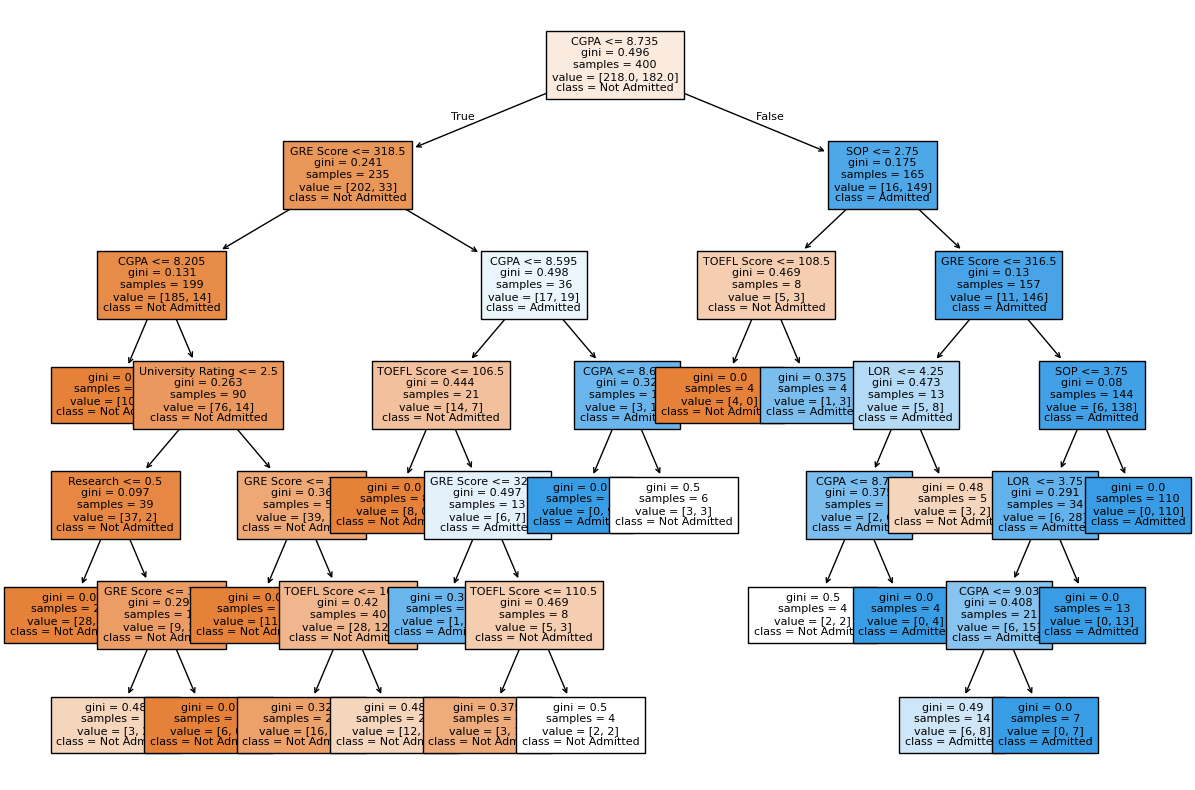

In [5]:
# Set figure size
plt.figure(figsize=(15, 10))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=["Not Admitted", "Admitted"], filled=True, fontsize=8)

# Show the plot
plt.show()

In [6]:
# Extract and print rules from the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- CGPA <= 8.73
|   |--- GRE Score <= 318.50
|   |   |--- CGPA <= 8.20
|   |   |   |--- class: 0
|   |   |--- CGPA >  8.20
|   |   |   |--- University Rating <= 2.50
|   |   |   |   |--- Research <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Research >  0.50
|   |   |   |   |   |--- GRE Score <= 311.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- GRE Score >  311.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- University Rating >  2.50
|   |   |   |   |--- GRE Score <= 306.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- GRE Score >  306.50
|   |   |   |   |   |--- TOEFL Score <= 105.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- TOEFL Score >  105.50
|   |   |   |   |   |   |--- class: 0
|   |--- GRE Score >  318.50
|   |   |--- CGPA <= 8.59
|   |   |   |--- TOEFL Score <= 106.50
|   |   |   |   |--- class: 0
|   |   |   |--- TOEFL Score >  106.50
|   |   |   |   |--- GRE Score <= 321.50
|   |   |   |   |   |--